In [1]:
!uname -r

6.1.123+


In [2]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# importing module to build ANN using keras which back by Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
!python3 -V

Python 3.11.12


In [5]:
# reading data from github raw ULR using pandas
df = pd.read_csv('https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/all_month.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [6]:
# Define feature and label
features = ['latitude','longitude','depth']
target = 'mag'
# droping mising value
df = df.dropna(subset=[target])


In [7]:
# prepare data
X = df[features]
y = df[target]
# printing x and y
print(X.head())
print(y.head())

    latitude   longitude  depth
0  38.840668 -122.834335   1.32
1  61.556800 -141.271600  13.40
2  61.789200 -149.608200  38.70
3  60.081400 -152.528700  97.80
4  35.639833 -117.548500   8.08
0    0.53
1    1.20
2    1.20
3    1.40
4    0.89
Name: mag, dtype: float64


In [10]:
# split data for training and testing purpose with 80 and 20 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
# printing scaled features
print(X_scaled)
# testing data only need in eval so we need to share transform data to model
X_test_scaled = scaler.transform(X_test)


[[0.70307785 0.18790648 0.01925443]
 [0.5461604  0.30949317 0.17259949]
 [0.7720788  0.00518451 0.02276779]
 ...
 [0.6886728  0.15849472 0.01968401]
 [0.66324301 0.17338441 0.01968401]
 [0.68432333 0.1588693  0.00874504]]


In [14]:
# Building ANN  Input layer is self defined by Keras or other module
# input layer neurons is gonna be equal to number of input / features
# Define model using Sequence
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)), # First hidden layer (3 features)
    Dense(32, activation='relu'), # Second hidden layer
    Dense(1) # Output layer Regression / linear regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# model compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# training model with 10 epochs
ashu_model = model.fit(X_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6864 - val_loss: 0.6482
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6930 - val_loss: 0.6450
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6946 - val_loss: 0.6353
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6918 - val_loss: 0.6360
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6623 - val_loss: 0.6362
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6506 - val_loss: 0.6258
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6782 - val_loss: 0.6205
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6339 - val_loss: 0.6276
Epoch 9/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6343 - val_loss: 0.6153
Epoch 10/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6351 - val_loss: 0.6347
Epoch 11/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6329 - val_loss: 0.6069
Epoch 12/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [21]:
# model eval with transformed test data -- X_test_scaled
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss:2f}')


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5749
Test Loss: 0.574491


In [22]:

# we can do prediction as well
predicted_value = model.predict(X_test_scaled)
print(predicted_value)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[1.1413237 ]
 [1.2670987 ]
 [1.0342369 ]
 ...
 [0.95617956]
 [1.1426086 ]
 [4.6688356 ]]


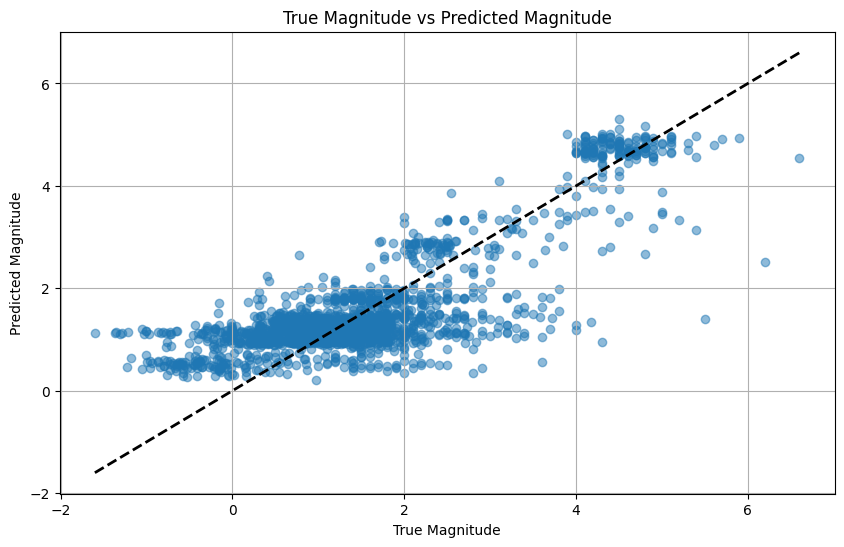

In [23]:
# visualize using matplot predicted vs True magnitude
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_value, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('True Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('True Magnitude vs Predicted Magnitude')
plt.grid(True)
plt.show()